# Assignment 1 - FIT5202 Data processing for Big Data

##  Part A: Analysing Text Data

In this part,we will look into modern software development methodologies.The everyday job of a data scientist/data engineer/software engineer involves working in a project team and following software development methodologies to develop software products or do data analysis.To prepare for such a career,it would be useful to have knowledge on the common software development methodologies. In this assignment,we will analyse two books on software development methodologies.We will see the distribution of words,the most common words in both books and the average frequency.This approach can also be scaled to find the most common words andd istribution of all words in the Internet.
<br>
### Step 01: Import ​pyspark ​and initialize Spark
Pyspark is the SparkPython API that exposes the Spark programming model to Python. SparkContext is the main entry point for Spark functionality. In Spark, communication occurs between a driver and executors. The driver has Spark jobs that it needs to run and these jobs are split into tasks that are submitted to the executors for completion. The results from these tasks are delivered back to the driver. In order to use Spark and its API,we will need to use a SparkContext. When running Spark, you start a new Spark application by creating as park Context. When the Spark Context is created, it asks the master for some cores to use to do the processing.The master sets these cores aside; they won’t be used for other applications. **Write the code** to create a SparkContext object, which tells Spark how to access a cluster.To create a Spark Context you first need to build a SparkConf object that contains information about your application. Give an appropriate name for your application and run Spark locally with as many working processors as logical cores on your machine.

In [1]:
# create entry points to spark
from pyspark import SparkContext, SparkConf # Spark
from pyspark.sql import SparkSession

sc = SparkContext.getOrCreate()

# We will build a configuration 
conf = SparkConf()
conf.set("spark.app.name", "Assignment 1")
conf.set("spark.master", "local[*]")

# If there is no existing spark context, we now create a new context
if (sc is None):
    sc = SparkContext(conf=conf)
spark = SparkSession(sparkContext=sc)

### Step 02: Create Resilient Distributed Datasets (RDDs)

A SparkContext can be used to create Resilient Distributed Datasets (RDDs) on a cluster. Write the code in pyspark to read the required dataset and display the total number of lines in each dataset.


In [2]:
# Transforming the Data in RDDs 
scrum_rdd = sc.textFile('Datasets\Scrum Handbook.txt')
agile_rdd = sc.textFile('Datasets\Agile Processes  in Software Engineering  and Extreme Programming.txt')

In [3]:
# Counting and display the number of lines
print('Number of lines in Scrum Handbook: ', scrum_rdd.count())
print('Number of lines in Agile Processes in Software Engineering and Extreme Programming: ', agile_rdd.count())

Number of lines in Scrum Handbook:  4617
Number of lines in Agile Processes in Software Engineering and Extreme Programming:  21569


### Step 03: Cleaning/Manipulating text.
Words should be counted independent of their case. So, you will have to change all words to lower case. Further, if there are any leading or trailing spaces on a line, it should be removed. Write a function that performs the following tasks on the RDDs: <br>
1.Removes all characters which are not alphabets except space(s).<br>
2.Changes all upper case letters to lowercase.<br>
3.Removes all leading or trailing spaces. <br>
You can use the python module re for matching patterns. Finally, display the contents ofthe RDDs after applying the function.

In [4]:
import re # we will use the library regex for this assigment

In [5]:
patternSpecialChar = r'[^a-zA-Z\s]*' # this regex pattern will identify any digit or special character

In [6]:
# Cleaning the scrum_rdd
scrum_rdd = scrum_rdd.map(lambda x: re.sub(patternSpecialChar , '', x)) # removing digits and special characters
scrum_rdd = scrum_rdd.map(lambda x: x.lower()) # Change uppercase to lowercase
scrum_rdd = scrum_rdd.map(lambda x: x.strip()) # remove trailing spaces
scrum_rdd.take(10)

['jeff sutherlands',
 '',
 'scrum handbook',
 '',
 '',
 '',
 '',
 'everything',
 'you need',
 'to know']

In [7]:
# Cleaning the agile_rdd
agile_rdd = agile_rdd.map(lambda x: re.sub(patternSpecialChar , '', x)) # removing digits and special characters
agile_rdd = agile_rdd.map(lambda x: x.lower()) # Change uppercase to lowercase
agile_rdd = agile_rdd.map(lambda x: x.strip()) # remove trailing spaces
agile_rdd.take(10)

['lnbip',
 '',
 '',
 'i helen sharp',
 '',
 'tracy hall eds',
 '',
 'agile processes',
 'in software engineering',
 'and extreme programming']

### Step 04: Transforming the Data/Counting the words  
Apply a transformation that will split each element of the RDD by its spaces and then create a word pairs for e.g. ('agile',1), ('handbook',1). Then, count the frequency of each word and display the top 20 most frequent words.

In [8]:
# We will do the following steps in both RDDS
# step 1: Create a flat RDD with every word and filter empty elements   
# step 2: Generate keys and reduce by key to count the number of words
# step 3: Sort the RDD

count_scrum_words_list = scrum_rdd.flatMap(lambda x: x.split(" ")).filter(lambda word: word != "")
count_scrum_words_list = count_scrum_words_list.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
count_scrum_words_list.sortBy(lambda x: x[1], ascending=False).take(10)

[('the', 1238),
 ('of', 537),
 ('and', 534),
 ('to', 477),
 ('a', 451),
 ('scrum', 395),
 ('in', 360),
 ('is', 348),
 ('team', 260),
 ('product', 232)]

In [9]:
# Repeating the previous steps
count_agile_words_list = agile_rdd.flatMap(lambda x: x.split(" ")).filter(lambda word: word != "")
count_agile_words_list = count_agile_words_list.map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
count_agile_words_list.sortBy(lambda x: x[1], ascending=False).take(10)

[('the', 8145),
 ('and', 3965),
 ('of', 3944),
 ('to', 3714),
 ('in', 3076),
 ('a', 2701),
 ('is', 1539),
 ('that', 1355),
 ('for', 1194),
 ('as', 1028)]

### Step 05: Removing Stop Words
In computing, stop words are words which are filtered out before or after processing of natural language data. In natural language processing, useless words(data), are referred to as stop words. We would not want these words taking up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to be stopwords. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages. Write the code to remove stopwords from the RDDs.You should use nltk package to remove the stop words. Also find how many unique words do we now have in each RDD?

In [10]:
# Installing NLTK, downloading and importing stopwords  
# !pip install nltk
from nltk.corpus import stopwords
import nltk
# nltk.download('stopwords')
stop_words = stopwords.words('english') # assignimg stopwords to a variable

In [11]:
# Filter stop words in both RDDs with a lambda function
count_scrum_words_list = count_scrum_words_list.filter(lambda x: x[0] not in stop_words)
print('There are', count_scrum_words_list.count(),'unique words in the Scrum Handbook')  # Display unique words

There are 2936 unique words in the Scrum Handbook


In [12]:
count_agile_words_list = count_agile_words_list.filter(lambda x: x[0] not in stop_words)
print('There are', count_agile_words_list.count(),'unique words in the Agile book')  # Display unique words

There are 9611 unique words in the Agile book


### Step 06: Find the average occurrence of a word
To find the average occurrence of a word, you will have to find the total number of words and divide that by the number of unique words. Write the code to find the average occurrences of the words.

In [13]:
scrum_Total_words = count_scrum_words_list.values().sum()
scrum_Total_unique_words = count_scrum_words_list.count()
scrum_average_ocurrence = scrum_Total_words/scrum_Total_unique_words
print('The average ocorrunce of words is', round(scrum_average_ocurrence,2), 'times')

The average ocorrunce of words is 3.68 times


In [14]:
agile_Total_words = count_agile_words_list.values().sum()
agile_Total_unique_words = count_agile_words_list.count()
agile_average_ocurrence = agile_Total_words/agile_Total_unique_words
print('The average ocorrunce of words is', round(agile_average_ocurrence,2), 'times')

The average ocorrunce of words is 8.23 times


### Step 7: Exploratory data analysis
Analyze the distribution of the words using the standard python library - matplotlib. Please make sure you are aware of the different factors such as visual effects, coordinate system, labels, data type and scale and informative interpretation before data visualisation. Also consider other aspects of visualization like clarity, accuracy and efficiency as well. <br> 
- Compare the distribution of words in Book1 and Book2 The data spans many orders of magnitude and the features of the distribution not quite evident in the linear space. Therefore, use logscale(base10) to plot the graph. Explain your understanding based on the graphs. 


-------------------------------------------------------------------------------------------------------------------



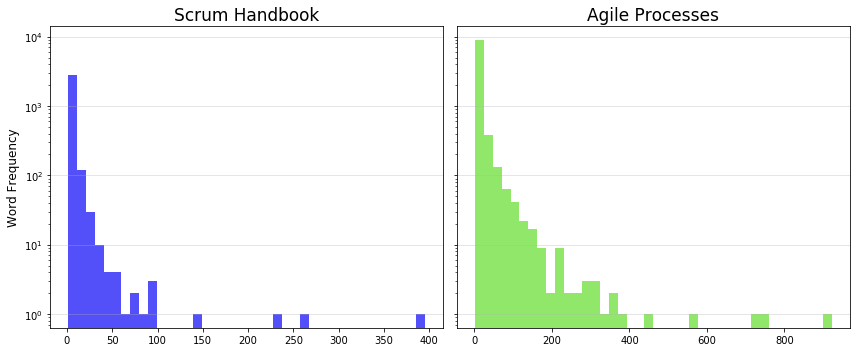

In [15]:
# part1
# !pip install matplotlib
import matplotlib.pyplot as plt # importing the visualization library
%matplotlib inline

# Transforming our variables into lists for plotting
x1 = count_scrum_words_list.values().collect() 
x2 = count_agile_words_list.values().collect()


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)

ax1.hist(x1, label = 'Scrum', color='#0c06f7',alpha=0.7, log = True, bins = 40)
ax1.set_title('Scrum Handbook', fontsize = 17)
ax1.set_ylabel('Word Frequency', fontsize = 12)
ax1.grid(axis = 'y', alpha = 0.4)

ax2.hist(x2, label = 'Agile', color='#61de2a',alpha=0.7, log = True , bins = 40)
ax2.set_title('Agile Processes', fontsize = 17)
ax2.grid(axis = 'y', alpha = 0.4)
plt.tight_layout()
plt.show()

<font color = "green"><b>
- The books have very similar distributions regarding their word frequencies. In both cases, the highest bin is the first one, that means the vast majority of words repeat itself very rarerly. 
    - In consequence, both books have a right skewed distribution. 
    - It is worth mentioning however, that the Scrum handbook is a little bit more concetraded, in other words has a smaller variance in its distribution. 
- Due to the fact that the books have different sizes, we cannot plot than over the same x axis to understand its distributions. The same is valid for the y_axis, and this is why we have applied the log scale.
</font><b>

- Compare the top 15 most common words in Book1 and Book2. Plot the graphs and explain your understanding of the graph.

In [16]:
# collecting the data for both books
# spliting the data into lists 
# one for the words and the other for the count

scrum_words_list_count = count_scrum_words_list.sortBy(lambda x: x[1], ascending=False).collect()[:15]
scrum_words_list = [x[0] for x in scrum_words_list_count]
scrum_words_count = [x[1] for x in scrum_words_list_count]

agile_words_list_count = count_agile_words_list.sortBy(lambda x: x[1], ascending=False).collect()[:15]
agile_words_list = [x[0] for x in agile_words_list_count]
agile_words_count = [x[1] for x in agile_words_list_count]

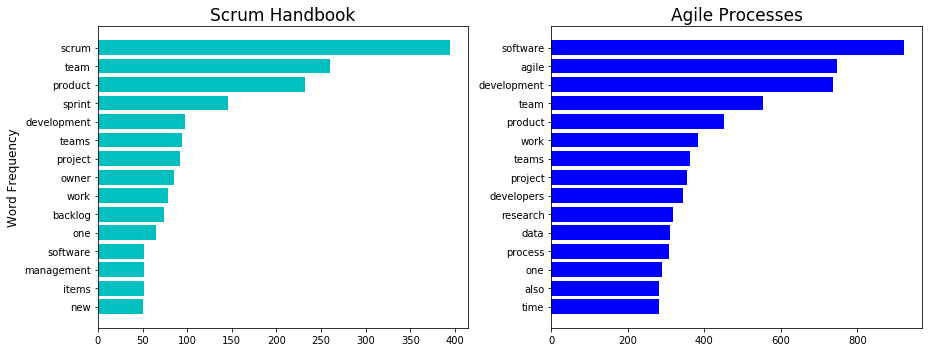

In [17]:
# plotting the chart
# adjusting title, fontsize, structure,....

import numpy as np # used as support for the charts regarding labels in the y axis

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,5), tight_layout=True)

y_posax1 = np.arange(len(scrum_words_list))
ax1.barh(y_posax1, scrum_words_count, color = 'c')
ax1.set_yticks(y_posax1)
ax1.set_yticklabels(scrum_words_list)
ax1.invert_yaxis()  # labels read top-to-bottom
ax1.set_title('Scrum Handbook', fontsize = 17)
ax1.set_ylabel('Word Frequency', fontsize = 12)

y_posax2 = np.arange(len(agile_words_list))
ax2.barh(y_posax1, agile_words_count, color = 'b')
ax2.set_yticks(y_posax1)
ax2.set_yticklabels(agile_words_list)
ax2.invert_yaxis()  # labels read top-to-bottom
ax2.set_title('Agile Processes', fontsize = 17)

plt.show()


<font color = "green"><b>
- Eight words are the at the top 15 most common at both books.
    - The books are from the same field(computer science). Therefore, no surprise in the same words.
- Again, very similar distributions, although variance is higher in scrum handbook. 
- Since the agile book is much bigger, it is expected that the word frequency is also much bigger.
- Both books have an word from the title as the most common word.
</font><b>